In [2]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

from data_loading import load_annotated_6k_collection

In [3]:
tfs = load_annotated_6k_collection()

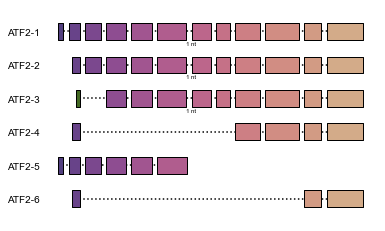

In [19]:
tfs['ATF2'].exon_diagram()

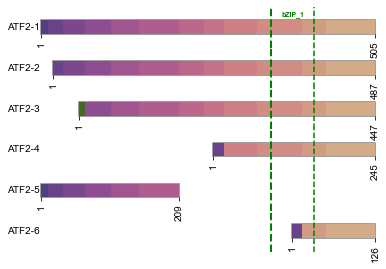

In [175]:
tfs['ATF2'].protein_diagram()

In [178]:
tfs['ZSCAN26']['ZSCAN26-1'].aa_seq_features

[Pfam_domain: PF02023 SCAN 47-136,
 Pfam_domain: PF02023 SCAN 378-415,
 Pfam_domain: PF09723 Zn-ribbon_8 230-267,
 Pfam_domain: PF09723 Zn-ribbon_8 275-307,
 Pfam_domain: PF09723 Zn-ribbon_8 309-351,
 Pfam_domain: PF09723 Zn-ribbon_8 366-406,
 Pfam_domain: PF09723 Zn-ribbon_8 421-463,
 Pfam_domain: PF01286 XPA_N 282-298,
 Pfam_domain: PF01286 XPA_N 309-322,
 Pfam_domain: PF01286 XPA_N 337-355,
 Pfam_domain: PF01286 XPA_N 365-385,
 Pfam_domain: PF01286 XPA_N 393-412,
 Pfam_domain: PF01286 XPA_N 421-440,
 Pfam_domain: PF01286 XPA_N 449-471,
 ZF_array: C2H2_ZF_array_9 C2H2_ZF_array_9 217-477,
 DBD_flank: C2H2_ZF_array_9_flank_N N_DBD_flank 202-216,
 DBD_flank: C2H2_ZF_array_9_flank_C C_DBD_flank 478-478]

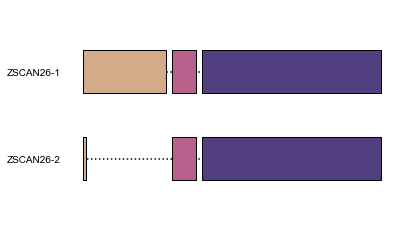

In [181]:
tfs['ZSCAN26'].exon_diagram()

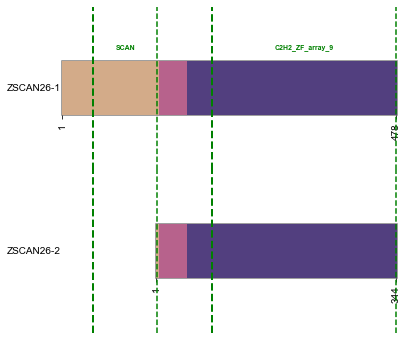

In [188]:
tfs['ZSCAN26'].protein_diagram()

In [227]:
tfs['ZSCAN26'].pairwise_changes_relative_to_reference('ZSCAN26-1', 'ZSCAN26-2')

'MMMMMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM'

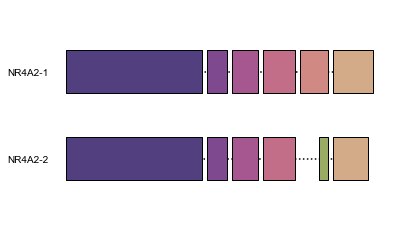

In [220]:
tfs['NR4A2'].exon_diagram()

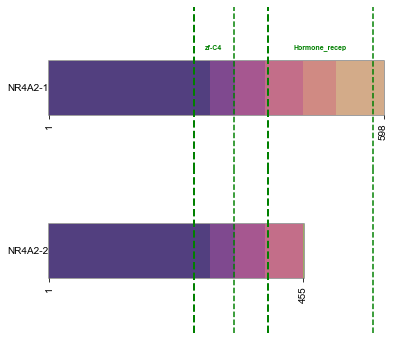

In [221]:
tfs['NR4A2'].protein_diagram()

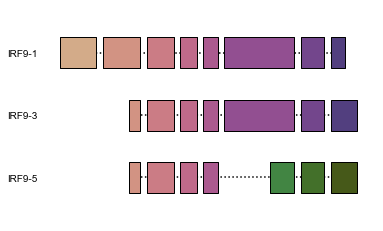

In [286]:
tfs['IRF9'].exon_diagram()

In [282]:
iso = tfs['IRF9']['IRF9-1']
print(len(iso.aa_seq),
      len(iso.nt_seq) / 3,
      sum(len(e) for e in iso.exons) / 3)

393 393.0 393.0


In [284]:
tfs['IRF9'].orfs[0].name

'IRF9-1'

In [285]:
# debug IRF9
tfs['IRF9'].pairwise_changes_relative_to_reference('IRF9-1', 'IRF9-1')[]

'MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM'

In [222]:
for tf in tfs.values():
    fig, ax = plt.subplots()
    try:
        tf.protein_diagram(ax=ax)
    except:
        print(tf)
        raise
    plt.savefig('../../figures/per_gene/protein_diagram/{}.pdf'.format(tf.name),
                bbox_inches='tight')
    plt.close(fig)

In [223]:
for tf in tfs.values():
    fig, ax = plt.subplots()
    try:
        tf.exon_diagram(ax=ax)
    except:
        print(tf)
        raise
    plt.savefig('../../figures/per_gene/exon_diagram/{}.pdf'.format(tf.name),
                bbox_inches='tight')
    plt.close(fig)

In [241]:
import pandas as pd
df = []
row = {}
for tf in tfs.values():
    row['gene'] = tf.name
    row['ref_iso'] = tf.orfs[0].name
    for orf in tf.orfs[1:]:
        row['alt_iso'] = orf.name
        row['changes'] = tf.pairwise_changes_relative_to_reference(tf.orfs[0].name, orf.name)
        df.append(row.copy())
df = pd.DataFrame(df)

In [243]:
df['is_frameshift'] = df['changes'].str.contains('f') | df['changes'].str.contains('F')
df['n_frameshift_res'] = df['changes'].str.count('f') + df['changes'].str.count('F')

In [244]:
df['is_frameshift'].sum()

58

In [245]:
df.shape

(447, 5)

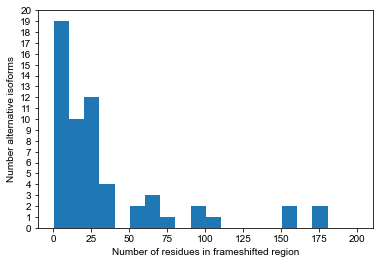

In [264]:
df.loc[df['is_frameshift'], 'n_frameshift_res'].plot.hist(range=(0.5, 200.5), bins=20)
plt.yticks(range(21))
plt.ylabel('Number alternative isoforms')
plt.xlabel('Number of residues in frameshifted region')
plt.savefig('../../figures/frameshift_size_dist.pdf')

In [262]:
df.sort_values('n_frameshift_res', ascending=False).head(15)

,gene,ref_iso,alt_iso,changes,is_frameshift,n_frameshift_res
144,ZSCAN21,ZSCAN21-1,ZSCAN21-2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,178
415,ZSCAN18,ZSCAN18-1,ZSCAN18-2,DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD...,True,178
306,ZNF276,ZNF276-1,ZNF276-2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,160
308,ZNF276,ZNF276-1,ZNF276-4,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,160
270,IRF9,IRF9-1,IRF9-5,DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD...,True,102
410,ZNF180,ZNF180-1,ZNF180-2,DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDfffffffffffffIII...,True,98
305,ZNF263,ZNF263-1,ZNF263-3,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,97
344,NFATC1,NFATC1-1,NFATC1-2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,80
317,ZNF747,ZNF747-1,ZNF747-2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,67
318,ZNF747,ZNF747-1,ZNF747-3,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,67


In [306]:
'MMMMffffMMMM'.partition('f')

('MMMM', 'f', 'fffMMMM')

In [307]:
# check for MfM or M

def in_out_in_frame(s):
    if 'f' in s:
        before, __, after = s.partition('f')
        return 'M' in before and 'M' in after
    elif 'F' in s:
        before, __, after = s.partition('F')
        return 'M' in before and 'M' in after
    else:
        return False

df['in_out_in_frame'] = df['changes'].apply(in_out_in_frame)

In [309]:
df[df['in_out_in_frame']]

,gene,ref_iso,alt_iso,changes,is_frameshift,n_frameshift_res,in_out_in_frame
306,ZNF276,ZNF276-1,ZNF276-2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,160,True
308,ZNF276,ZNF276-1,ZNF276-4,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,160,True
372,ZNF544,ZNF544-1,ZNF544-2,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,True,17,True


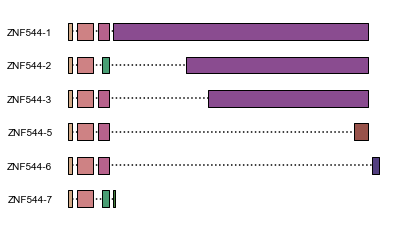

In [311]:
tfs['ZNF544'].exon_diagram()

In [296]:
(len(tfs['NFATC1']['NFATC1-1'].aa_seq),
 len(tfs['NFATC1']['NFATC1-2'].aa_seq))

(716, 639)

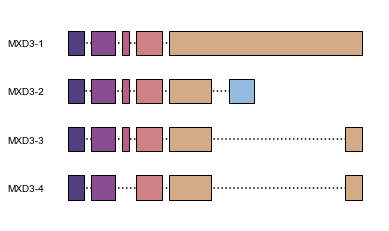

In [299]:
tfs['MXD3'].exon_diagram()

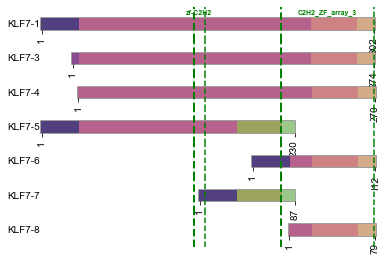

In [297]:
tfs['KLF7'].protein_diagram()

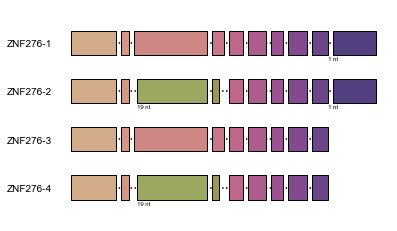

In [301]:
tfs['ZNF276'].exon_diagram()

In [302]:
# how many cases where it goes back into frame?
tfs['ZNF276'].pairwise_changes_relative_to_reference('ZNF276-1',
                                                     'ZNF276-2')

'MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMDDDDDDffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffDDDDDDDDDDDMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM'

In [233]:
df['is_frameshift'].sum()

0

In [92]:
tfs['ZNF473'].orfs[0].aa_seq_features

[Pfam_domain: PF09723 Zn-ribbon_8 208-249,
 Pfam_domain: PF09723 Zn-ribbon_8 265-294,
 Pfam_domain: PF09723 Zn-ribbon_8 319-345,
 Pfam_domain: PF09723 Zn-ribbon_8 402-444,
 Pfam_domain: PF09723 Zn-ribbon_8 455-499,
 Pfam_domain: PF09723 Zn-ribbon_8 514-525,
 Pfam_domain: PF09723 Zn-ribbon_8 561-607,
 Pfam_domain: PF09723 Zn-ribbon_8 644-672,
 Pfam_domain: PF09723 Zn-ribbon_8 673-715,
 Pfam_domain: PF09723 Zn-ribbon_8 729-771,
 Pfam_domain: PF09723 Zn-ribbon_8 785-824,
 Pfam_domain: PF09723 Zn-ribbon_8 841-870,
 Pfam_domain: PF01286 XPA_N 208-227,
 Pfam_domain: PF01286 XPA_N 320-336,
 Pfam_domain: PF01286 XPA_N 346-358,
 Pfam_domain: PF01286 XPA_N 374-393,
 Pfam_domain: PF01286 XPA_N 430-443,
 Pfam_domain: PF01286 XPA_N 458-477,
 Pfam_domain: PF01286 XPA_N 486-499,
 Pfam_domain: PF01286 XPA_N 514-527,
 Pfam_domain: PF01286 XPA_N 561-581,
 Pfam_domain: PF01286 XPA_N 590-605,
 Pfam_domain: PF01286 XPA_N 645-664,
 Pfam_domain: PF01286 XPA_N 673-690,
 Pfam_domain: PF01286 XPA_N 701-720,
 Pf

In [88]:
max(tfs.values(), key=lambda x: len(x.orfs[0].aa_seq_features))

Gene: ZNF473
Isoforms: ['ZNF473-1', 'ZNF473-2']

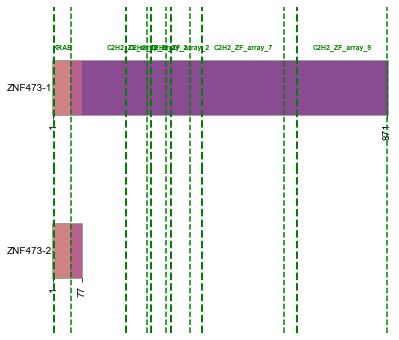

In [303]:
tfs['ZNF473'].protein_diagram()